<a href="https://colab.research.google.com/github/PHYS486-S22/PHYS486-S22/blob/main/ProjectZero/ProjectZero-Complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import packages that we'll use often.
import numpy as np
import math

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

#plt.rcParams['text.usetex'] = True
#plt.rcParams['font.family'] = "serif"
#plt.rcParams['font.serif'] = "cm"
#plt.rcParams['text.latex.preamble'] = "\usepackage{subdepth}, \usepackage{type1cm}"

### Analytic Solutions

The underlying differential equations are:

$\frac{dN_A}{dt} = - \frac{N_A}{\tau_A}~~~~~~~~~~$    and

$\frac{dN_B}{dt} = \frac{N_A}{\tau_A} - \frac{N_B}{\tau_B}$

where the population of isotope X is identified with the variable N$_X$, and the decay time constant of isotope X is $\tau_X$.  As the write-up notes, these differential equations can be solved using populations scaled by $N_A(0)$, the initial population of $N_A$, and decay constants scaled by $\tau_A$, the decay timescale of isotope A.  The resulting solutions are: 

$N_A(t) = e^{-t}$, 

for $\gamma \neq 1~$; $~~~N_B(t) = N_B(0)~e^{-\gamma t} + \frac{e^{-t}-e^{-\gamma t}}{\gamma - 1}$ 

for $\gamma = 1~$; $~~~N_B(t) = N_B(0)~e^{-t} + t~e^{-t}$ 


### Routines for Eulerian Loop

In [2]:
#define a function that calculates dN_A/dt and dN_B/dt
#function does not require special units for any of the variables.
def calculate_derivatives(N_A, N_B, tau_A, tau_B):
    dNa_dt = -N_A / tau_A
    dNb_dt = (N_A / tau_A) - (N_B / tau_B)
    return dNa_dt, dNb_dt

In [3]:
#define a function that applies derivatives to calculate new population values, projected forward by a given time_step size
def update_populations(N_A, N_B, tau_A, tau_B, time_step):
    dNa_dt, dNb_dt = calculate_derivatives(N_A, N_B, tau_A, tau_B)
    new_Na = N_A + dNa_dt*time_step
    new_Nb = N_B + dNb_dt*time_step
    return new_Na, new_Nb

In [4]:
#define a function that calculates the size of each population for a requested span of time,
#using a specified number of time steps. 
def project_populations(N_A0, N_B0, tau_A, tau_B, time_span, n_steps):
    
    #find the number of steps we need to cover the requested span;
    #create the array with the correct number and specific values of the requested time steps 
    times = np.linspace(0, time_span, n_steps)
    time_step = time_span/n_steps
    
    #create arrays to store the populations of each decay product in
    N_A = np.zeros(n_steps)
    N_A[0] = N_A0
    N_B = np.zeros(n_steps)
    N_B[0] = N_B0
    
    #now loop through all the timesteps and use the Eulerian-based 
    #'update_populations' function to calculate the size of each population as a function of time
    for x in range(0,n_steps-1):
        N_A[x+1], N_B[x+1] = update_populations(N_A[x], N_B[x], tau_A, tau_B, time_step)
    return times, N_A, N_B

In [5]:
#finally, define a function that sets the population equations up
#in a normalized framework based on a specified N_B and gamma
def define_variables(N_B, gamma): 
    N_A = 1.0
    tau_A = 1.0
    tau_B = tau_A/gamma
    return N_A, N_B, tau_A, tau_B

### Numerical Solution via Eulerian Method
start by defining an analytic function that takes in the initial sizes of populations A and B, $\gamma$ (the ratio of the time constants), and an array of times, and outputs an array with the size of population B (relative to the initial population of A) at each time step.

In [6]:
def analyticB(N_A0, N_B0, gamma, times):
    if gamma != 1:
        n_B = (N_B0/N_A0)*np.exp(-1.*gamma*times)+(np.exp(-times)-np.exp(-1.*gamma*times))/(gamma-1)
    else: 
        n_B = (N_B0/N_A0)*np.exp(-1.*gamma*times)+ times*np.exp(-times) 
    return n_B

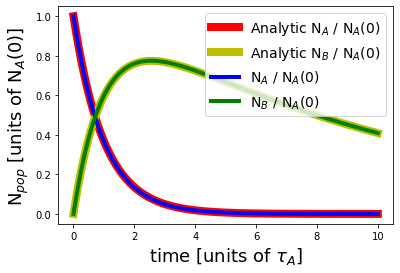

In [18]:
#now set up the problem. Do it in terms of the reduced variables.
relative_NB = 0.
gamma = 0.1
time_span = 10.  # remember, this is expressed in terms of tau_A

#now run for various step sizes (iteratively -- this cell only does one calculation, 
#so we'll have to visually examine plots to see how things change)
n_steps = 1000 
N_A0, N_B0, tau_A, tau_B = define_variables(relative_NB, gamma)
times_n1000, N_A_n1000, N_B_n1000 = project_populations(N_A0, N_B0, tau_A, tau_B, time_span, n_steps)

#Now calculate analytic solutions (I've given you this function!)
analyticN_Bs = analyticB(N_A0, N_B0, gamma, times_n1000)

plotAnalyticNa, = plt.plot(times_n1000, np.exp(-times_n1000), linewidth=8, color = 'r', label = 'Analytic N$_A$ / N$_A$(0)')
plotAnalyticNb, = plt.plot(times_n1000, analyticN_Bs, linewidth=8, color = 'y', label = 'Analytic N$_B$ / N$_A$(0)')
plotNa, = plt.plot(times_n1000, N_A_n1000, linewidth = 4, color = 'b', label = 'N$_A$ / N$_A$(0)')
plotNb, = plt.plot(times_n1000, N_B_n1000, linewidth = 4, color = 'g', label = 'N$_B$ / N$_A$(0)')

#plt.axis([29,31,65,66])
xlabel = plt.xlabel(r'time [units of $\tau_A$]') 
ylabel = plt.ylabel('N$_{pop}$ [units of N$_A(0)$]')
plt.legend(handles=[plotAnalyticNa, plotAnalyticNb, plotNa, plotNb], loc='best')
plt.savefig('HW1b_NB_NAvsGamma0.1.png', bbox_inches='tight')

1.0 0.0 1.0 0.2
5.0 1.001001001001001 0.09002795301322389


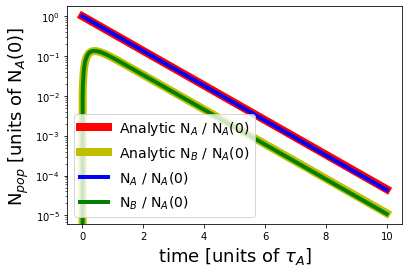

In [19]:
#now set up the problem. Do it in terms of the reduced variables.
relative_NB = 0.
gamma = 5.0
time_span = 10.  # remember, this is expressed in terms of tau_A

#now run for various step sizes
n_steps = 1000 
N_A0, N_B0, tau_A, tau_B = define_variables(relative_NB, gamma)
print(N_A0, N_B0, tau_A, tau_B)
times_n1000, N_A_n1000, N_B_n1000 = project_populations(N_A0, N_B0, tau_A, tau_B, time_span, n_steps)

idx = (np.abs(times_n1000 - 1)).argmin()
print(gamma, times_n1000[idx], N_B_n1000[idx])

analyticN_Bs = analyticB(N_A0, N_B0, gamma, times_n1000)

plotAnalyticNa, = plt.semilogy(times_n1000, np.exp(-times_n1000), linewidth=8, color = 'r', label = 'Analytic N$_A$ / N$_A$(0)')
plotAnalyticNb, = plt.semilogy(times_n1000, analyticN_Bs, linewidth=8, color = 'y', label = 'Analytic N$_B$ / N$_A$(0)')
plotNa, = plt.semilogy(times_n1000, N_A_n1000, linewidth = 4, color = 'b', label = 'N$_A$ / N$_A$(0)')
plotNb, = plt.semilogy(times_n1000, N_B_n1000, linewidth = 4, color = 'g', label = 'N$_B$ / N$_A$(0)')

#plt.axis([29,31,65,66])
xlabel = plt.xlabel(r'time [units of $\tau_A$]') 
ylabel = plt.ylabel('N$_{pop}$ [units of N$_A(0)$]')
plt.legend(handles=[plotAnalyticNa, plotAnalyticNb, plotNa, plotNb], loc=3)
plt.savefig('HW1b_NB_NAvsGamma5.png', bbox_inches='tight')

0.01 0.0 0.0
0.01 1.001001001001001 1.7220341711328544
0.03162277660168379 0.0 0.0
0.03162277660168379 1.001001001001001 1.7007257791002193
0.1 0.0 0.0
0.1 1.001001001001001 1.6354347389280897
0.31622776601683794 0.0 0.0
0.31622776601683794 1.001001001001001 1.448345701003596
1.0 0.0 0.0
1.0 1.001001001001001 1.0101010101010095
3.1622776601683795 0.0 0.0
3.1622776601683795 1.001001001001001 0.41165634521490846
10.0 0.0 0.0
10.0 1.001001001001001 0.11110304825378872
31.622776601683793 0.0 0.0
31.622776601683793 1.001001001001001 0.032655432033717506
100.0 0.0 0.0
100.0 1.001001001001001 0.010101010101010102


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


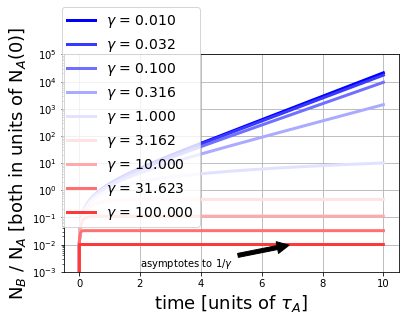

In [20]:
#now calculate the ratio of NB/NA for various gammas

#to do that, set parameters for the loop
relative_NB = 0.
time_span = 10.
n_gammas = 10
n_steps = 1000

#now create arrays to store the loop results in
gammas = np.zeros(n_gammas)
NB_NA = np.zeros((n_gammas,n_steps))

the_colors = iter(matplotlib.cm.bwr(np.linspace(0,1,n_gammas))) #matplotlib.colors.Colormap('bwr',10)

#start the loop
for x in range(0,n_gammas-1):

    #calculate gamma
    gammas[x] = 10.**((x-4)/2)
    #print(((x-4)/2), x, gammas[x])

    #run model and create ratio
    N_A0, N_B0, tau_A, tau_B = define_variables(relative_NB, gammas[x])
    times, this_N_A, this_N_B = project_populations(N_A0, N_B0, tau_A, tau_B, time_span, n_steps)
    NB_NA = this_N_B / this_N_A
    
    #plot ratio
    the_color = matplotlib.colors.Normalize(vmin=0, vmax=9)
    plotAnalyticNa, = plt.semilogy(times, NB_NA, linewidth=3, color = next(the_colors), label = '$\gamma$ = {:03.3f}'.format(gammas[x]) )

    #print values for t = 0 and t = 1
    print(gammas[x], times[0], NB_NA[0])
    idx = (np.abs(times - 1)).argmin()
    print(gammas[x], times[idx], NB_NA[idx])
    
xlabel = plt.xlabel(r'time [units of $\tau_A$]') 
ylabel = plt.ylabel('N$_B$ / N$_A$ [both in units of N$_A(0)$]')
limit = plt.ylim(0.001,10**5)
fig = plt.figure(1)
ax = fig.add_subplot(111)
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.2,1.25))
ax.grid('on')

ax.annotate('asymptotes to 1/$\gamma$', xy=(7, 10**(-2)), xytext=(2, 10**(-2.8)),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.savefig('HW1b_NB_NAvsGamma.png', bbox_extra_artists=(lgd,), bbox_inches='tight')



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


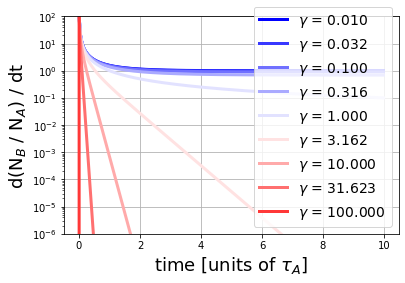

In [10]:
#now calculate the ratio of NB/NA for various gammas

#to do that, set parameters for the loop
relative_NB = 0.
time_span = 10.
n_gammas = 10
n_steps = 1000

#now create arrays to store the loop results in
gammas = np.zeros(n_gammas)
NB_NA = np.zeros((n_gammas,n_steps))

the_colors = iter(matplotlib.cm.bwr(np.linspace(0,1,n_gammas))) #matplotlib.colors.Colormap('bwr',10)

#start the loop
for x in range(0,n_gammas-1):

    #calculate gamma
    gammas[x] = 10.**((x-4)/2)
    #print(((x-4)/2), x, gammas[x])

    #run model and create ratio
    N_A0, N_B0, tau_A, tau_B = define_variables(relative_NB, gammas[x])
    times, this_N_A, this_N_B = project_populations(N_A0, N_B0, tau_A, tau_B, time_span, n_steps)
    NB_NA = this_N_B / this_N_A
    
    dNB_NA_frac = (NB_NA[1:n_steps-1] - NB_NA[0:n_steps-2]) / ( 0.5*(NB_NA[1:n_steps-1] + NB_NA[0:n_steps-2]) )
    
    dNB_NA_frac_dt = dNB_NA_frac / (times[1:n_steps-1] - times[0:n_steps-2]) 

    times_two = 0.5*(times[1:n_steps-1] + times[0:n_steps-2]) 
    
    #plot ratio
    the_color = matplotlib.colors.Normalize(vmin=0, vmax=9)
    plotAnalyticdNadBdt, = plt.semilogy(times_two, dNB_NA_frac_dt, linewidth=3, color = next(the_colors), label = '$\gamma$ = {:03.3f}'.format(gammas[x]) )

xlabel = plt.xlabel(r'time [units of $\tau_A$]') 
ylabel = plt.ylabel('d(N$_B$ / N$_A$) / dt')
limit = plt.ylim(0.000001,10**2)
fig = plt.figure(1)
ax = fig.add_subplot(111)
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc='lower right') #, bbox_to_anchor=(0.2,1.25))
ax.grid('on')

#ax.annotate('asymptotes to 1/$\gamma$', xy=(7, 10**(-2)), xytext=(2, 10**(-2.8)),
#            arrowprops=dict(facecolor='black', shrink=0.05),
#            )

plt.savefig('HW1b_dNB_NAvsGamma.png', bbox_extra_artists=(lgd,), bbox_inches='tight')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


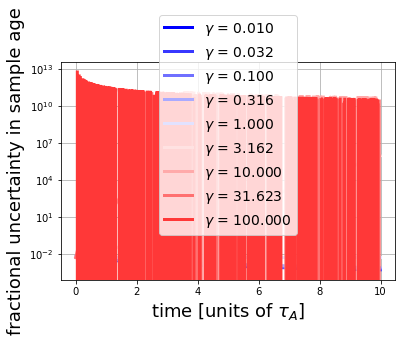

In [11]:
#now calculate the ratio of NB/NA for various gammas

#to do that, set parameters for the loop
relative_NB = 0.
time_span = 10.
n_gammas = 10
n_steps = 1000

#now create arrays to store the loop results in
gammas = np.zeros(n_gammas)
NB_NA = np.zeros((n_gammas,n_steps))

the_colors = iter(matplotlib.cm.bwr(np.linspace(0,1,n_gammas))) #matplotlib.colors.Colormap('bwr',10)

#start the loop
for x in range(0,n_gammas-1):

    #calculate gamma
    gammas[x] = 10.**((x-4)/2)
    #print(((x-4)/2), x, gammas[x])

    #run model and create ratio
    N_A0, N_B0, tau_A, tau_B = define_variables(relative_NB, gammas[x])
    times, this_N_A, this_N_B = project_populations(N_A0, N_B0, tau_A, tau_B, time_span, n_steps)
    NB_NA = this_N_B / this_N_A
    
    dNB_NA_frac = (NB_NA[1:n_steps-1] - NB_NA[0:n_steps-2]) / ( 0.5*(NB_NA[1:n_steps-1] + NB_NA[0:n_steps-2]) )
    
    dNB_NA_frac_dt = dNB_NA_frac / (times[1:n_steps-1] - times[0:n_steps-2]) 

    times_two = 0.5*(times[1:n_steps-1] + times[0:n_steps-2]) 
    
    #plot ratio
    the_color = matplotlib.colors.Normalize(vmin=0, vmax=9)
    plotAnalyticdNadBdt, = plt.semilogy(times_two, (0.005 / dNB_NA_frac_dt)/times_two, linewidth=3, color = next(the_colors), label = '$\gamma$ = {:03.3f}'.format(gammas[x]) )

xlabel = plt.xlabel(r'time [units of $\tau_A$]') 
ylabel = plt.ylabel(r'fractional uncertainty in sample age')
#limit = plt.ylim(0.001,10**5)
fig = plt.figure(1)
ax = fig.add_subplot(111)
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5,1.25))
ax.grid('on')

#ax.annotate('asymptotes to 1/$\gamma$', xy=(7, 10**(-2)), xytext=(2, 10**(-2.8)),
#            arrowprops=dict(facecolor='black', shrink=0.05),
#            )

plt.savefig('HW1b_dNB_NAvsGamma.png', bbox_extra_artists=(lgd,), bbox_inches='tight')


-2.0 0 0.01
-1.5 1 0.0316227766017
-1.0 2 0.1
-0.5 3 0.316227766017
0.0 4 1.0
0.5 5 3.16227766017
1.0 6 10.0
1.5 7 31.6227766017
2.0 8 100.0


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:35: RuntimeWarning: divide by zero encountered in true_divide


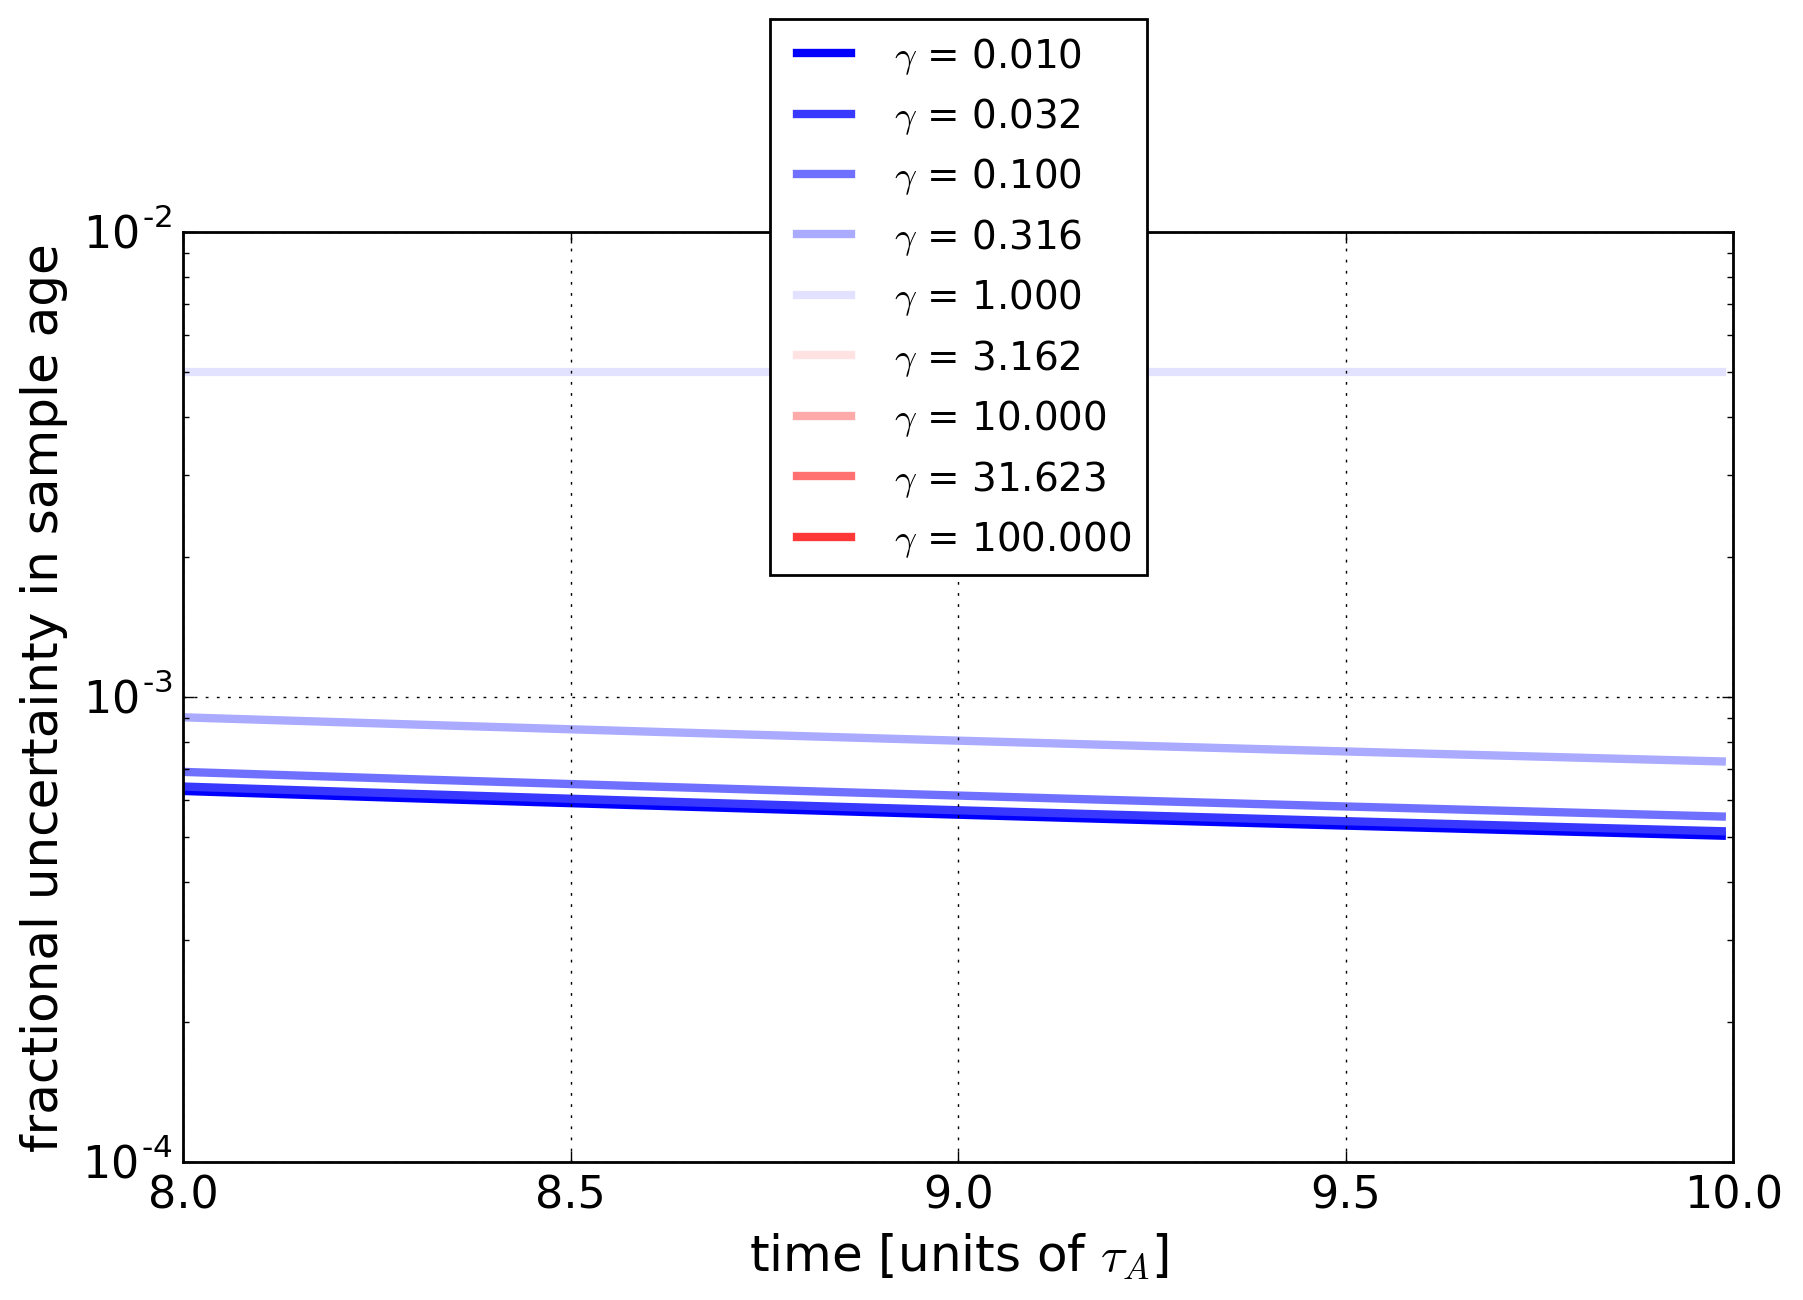

In [ ]:
#now calculate the ratio of NB/NA for various gammas

#to do that, set parameters for the loop
relative_NB = 0.
time_span = 10.
n_gammas = 10
n_steps = 1000

#now create arrays to store the loop results in
gammas = np.zeros(n_gammas)
NB_NA = np.zeros((n_gammas,n_steps))

the_colors = iter(matplotlib.cm.bwr(np.linspace(0,1,n_gammas))) #matplotlib.colors.Colormap('bwr',10)

#start the loop
for x in range(0,n_gammas-1):

    #calculate gamma
    gammas[x] = 10.**((x-4)/2)
    #print(((x-4)/2), x, gammas[x])

    #run model and create ratio
    N_A0, N_B0, tau_A, tau_B = define_variables(relative_NB, gammas[x])
    times, this_N_A, this_N_B = project_populations(N_A0, N_B0, tau_A, tau_B, time_span, n_steps)
    NB_NA = this_N_B / this_N_A
    
    dNB_NA_frac = (NB_NA[1:n_steps-1] - NB_NA[0:n_steps-2]) / ( 0.5*(NB_NA[1:n_steps-1] + NB_NA[0:n_steps-2]) )
    
    dNB_NA_frac_dt = dNB_NA_frac / (times[1:n_steps-1] - times[0:n_steps-2]) 

    times_two = 0.5*(times[1:n_steps-1] + times[0:n_steps-2]) 
    
    #plot ratio
    the_color = matplotlib.colors.Normalize(vmin=0, vmax=9)
    plotAnalyticdNadBdt, = plt.semilogy(times_two, (0.005 / dNB_NA_frac_dt)/times_two, linewidth=3, color = next(the_colors), label = '$\gamma$ = {:03.3f}'.format(gammas[x]) )

xlabel = plt.xlabel(r'time [units of $\tau_A$]') 
ylabel = plt.ylabel(r'fractional uncertainty in sample age')
ylimit = plt.ylim(0.0001,0.01)
xlimit = plt.xlim(8,10)

fig = plt.figure(1)
ax = fig.add_subplot(111)
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5,1.25))
ax.grid('on')

#ax.annotate('asymptotes to 1/$\gamma$', xy=(7, 10**(-2)), xytext=(2, 10**(-2.8)),
#            arrowprops=dict(facecolor='black', shrink=0.05),
#            )

plt.savefig('HW1b_dNB_NAvsGamma.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
